In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Leer el documento con ayuda de la funcion read_csv
df = pd.read_csv("vid.dat", sep=',')

In [10]:
#Vemos todas las columnas que existen , sin embargo solo nos interesan 
#Las variables TIMESTAMP (Fecha) y  AirTC_Avg (Temperatura del aire, ºC).
df.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [12]:
#Veremos como han sido identificados los datos , como observamos debemos modifcar el Timestamp de manera que logremos un datetime 
#AirTC_Avg  es reconocida como float64
df.dtypes

TIMESTAMP            object
RECORD                int64
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
Result1_Avg          object
Result2_Avg         float64
Result3_Avg         float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego_mm_Tot        float64
Perco_mm_Tot        

In [6]:

df["TIMESTAMP"] = pd.to_datetime(df.TIMESTAMP)

df = pd.DataFrame({"FECHA" : df["TIMESTAMP"],
                   "TEMP" : df["AirTC_Avg"]})

df["AÑO"] = df["FECHA"].dt.year
df["MES"] = df["FECHA"].dt.month
df["DIA"] = df["FECHA"].dt.day
df["HORA"] = df["FECHA"].dt.hour





AttributeError: 'DataFrame' object has no attribute 'TIMESTAMP'

In [4]:
#Verificamos 
df.head()


,FECHA,TEMP,AÑO,MES,DIA,HORA
0,2018-05-11 20:10:00,23.50,2018,5,11,20
1,2018-05-11 20:20:00,22.96,2018,5,11,20
2,2018-05-11 20:30:00,22.73,2018,5,11,20
3,2018-05-11 20:40:00,22.40,2018,5,11,20
4,2018-05-11 20:50:00,22.46,2018,5,11,20


In [5]:
df.head()

,FECHA,TEMP,AÑO,MES,DIA,HORA
0,2018-05-11 20:10:00,23.50,2018,5,11,20
1,2018-05-11 20:20:00,22.96,2018,5,11,20
2,2018-05-11 20:30:00,22.73,2018,5,11,20
3,2018-05-11 20:40:00,22.40,2018,5,11,20
4,2018-05-11 20:50:00,22.46,2018,5,11,20


In [222]:
df.tail()

,FECHA,TEMP,AÑO,MES,DIA,HORA
40655,2019-02-18 06:50:00,3.699,2019,2,18,6
40656,2019-02-18 07:00:00,3.492,2019,2,18,7
40657,2019-02-18 07:10:00,3.387,2019,2,18,7
40658,2019-02-18 07:20:00,3.243,2019,2,18,7
40659,2019-02-18 07:30:00,3.552,2019,2,18,7


In [223]:
# Debemos sumar UF24 según el modelo de Utah 
#
#              Modelo Utah
# TEMPERATURA   _________  UF CORRESPONDIENTE A 1 HORA 
#    < 1,4      _________     0 
#  1.5 a 2.4    _________    0.5 
#  2.5 a 9.1    _________    1.0
#  9.2 a 12.4   _________    0.5 
#  12.5 a 15.9  _________     0
#  16.0 a 18.0  _________   -0.5 
#    > 18.0     _________   -1.0
#
# Se nos solicita realizar el análisis a partir del 1 de noviembre del 2018 (1/11/2018)
# es decir Año > 2017 , Mes > 11 
# "AirTC_Avg"

In [7]:
hora_anterior = 20
suma = 0
c = 0
temps = []
fecha = []
for i in range(0,len(df)):
    if(df["HORA"][i] == hora_anterior):
        suma = suma + df["TEMP"][i]
        hora_anterior = df["HORA"][i]
        c = c+1
    else:
        temps.append(suma/c)
        fecha.append(df["FECHA"][i])
        suma = df["TEMP"][i]
        hora_anterior = df["HORA"][i]
        c = 1
temps.append(suma/c)
fecha.append(df["FECHA"][i])

In [8]:
## Creo un data frame con los promedios
df2 = pd.DataFrame({"FECHA" : fecha,
                    "TEMP" : temps})
df2["FECHA"] = pd.to_datetime(df2.FECHA)
df2["AÑO"] = df2["FECHA"].dt.year
df2["MES"] = df2["FECHA"].dt.month
df2["DIA"] = df2["FECHA"].dt.day
df2.head()

,FECHA,TEMP,AÑO,MES,DIA
0,2018-05-11 21:00:00,22.810000,2018,5,11
1,2018-05-11 22:00:00,21.876667,2018,5,11
2,2018-05-11 23:00:00,18.386667,2018,5,11
3,2018-05-12 00:00:00,17.540000,2018,5,12
4,2018-05-12 01:00:00,16.561667,2018,5,12


In [9]:
## Obtiene la unidad de frio acumulada en un dia (UF24) comenzando en el 01 de noviembre
## Ademas obtiene la temperatura maxima y minima de cada dia
suma = 0
sumas = []
fechas2 = []
tmax = -1000
tmin =  1000
tmaxs = []
tmins = []
for i in range(df2["AÑO"][0],df2["AÑO"][len(df2)-1]+1):
    dfnen = df2[df2["AÑO"] == i]
    for j in range(dfnen["MES"][dfnen.index[0]],dfnen["MES"][dfnen.index[len(dfnen)-1]]+1):
        if(j < 11 and i == 2018):
            continue
        else:
            dfmes = dfnen[dfnen["MES"] == j]
        for k in range(dfmes["DIA"][dfmes.index[0]],dfmes["DIA"][dfmes.index[len(dfmes)-1]]+1):
            dfdia = dfmes[dfmes["DIA"] == k]
            for n in dfdia.index:
                if(dfdia["TEMP"][n] > tmax):
                    tmax = dfdia["TEMP"][n]
                if(dfdia["TEMP"][n] < tmin):
                    tmin = dfdia["TEMP"][n]
                if(dfdia["TEMP"][n] < 1.5):
                    continue
                elif(dfdia["TEMP"][n] >= 1.5  and dfdia["TEMP"][n] < 2.5):
                    suma = suma + 0.5
                elif(dfdia["TEMP"][n] >= 2.5  and dfdia["TEMP"][n] < 9.2):
                    suma = suma + 1.0
                elif(dfdia["TEMP"][n] >= 9.2  and dfdia["TEMP"][n] < 12.5):
                    suma = suma + 0.5
                elif(dfdia["TEMP"][n] >= 12.5 and dfdia["TEMP"][n] < 16):
                    continue
                elif(dfdia["TEMP"][n] >= 16   and dfdia["TEMP"][n] < 18):
                    suma = suma - 0.5
                else:
                    suma = suma - 1.0
            fechas2.append(str(i) + " " + str(j) + " " + str(k))
            sumas.append(suma)
            suma = 0
            
            tmaxs.append(tmax)
            tmins.append(tmin)
            tmax = -1000
            tmin =  1000

In [10]:

## Crea el dataframe con las columnas de las unidades de frio acumuladas en las 24 horas.
UF24 = pd.DataFrame({"FECHA" : fechas2,
                     "Unidad Frio" : sumas,
                     "TMAX" : tmaxs,
                     "TMIN" : tmins})
UF24["FECHA"] = pd.to_datetime(UF24.FECHA)

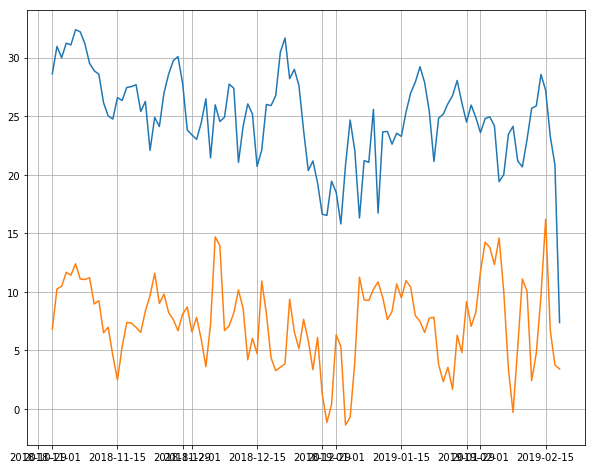

In [11]:
## Gráfica de la temperatura maxima y minima en una sola.
grupo = UF24[["TMAX","TMIN"]]
plt.figure(figsize = (10,8))
plt.plot(UF24["FECHA"],grupo)
plt.grid()
plt.show()

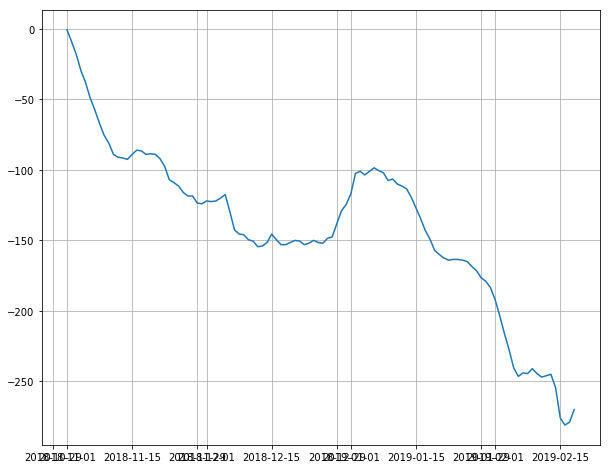

In [12]:

## gráfica de la acumulación de horas frío (suma de UF24). 
plt.figure(figsize = (10,8))
plt.plot(UF24["FECHA"],UF24["Unidad Frio"].cumsum())
plt.grid()
plt.show()